# 线性回归

## 美国房价问题

Alex经过一年的努力，终于拿到了美国波士顿麻省理工学院的研究生录取通知书，在远离家乡的地方上学，Alex想在波士顿买一套房子，他手头有一些积蓄，在网上找了几套自己满意的房子，但是又不敢相信网上的价格，人生地不熟的，Alex怕被宰，就从自己做数据分析的朋友Bachelor手里要到了过去几年一些有关波士顿房价的资料。

![](https://storage.googleapis.com/kaggle-competitions/kaggle/5315/logos/front_page.png)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!dir

 驱动器 G 中的卷是 Code
 卷的序列号是 AC81-1911

 G:\Python\PythonAI\第二模块_人工智能之机器学习、智能玩具\Linear_Regression_Learn 的目录

2020/02/02  21:39    <DIR>          .
2020/02/02  21:39    <DIR>          ..
2020/01/27  09:01    <DIR>          .ipynb_checkpoints
2019/12/15  21:33            13,370 data_description.txt
2020/02/02  21:39           209,869 Linear_Regression_Learn.ipynb
2019/12/15  21:33            31,939 sample_submission.csv
2019/12/15  21:33           451,405 test.csv
2019/12/15  21:33           460,676 train.csv
               5 个文件      1,167,259 字节
               3 个目录 92,071,428,096 可用字节


In [3]:
house_prices = pd.read_csv("train.csv")

Bachelor给的数据非常非常多，包含各个方面。

In [4]:
house_prices

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


为了方便分析呢，先提取其中三个特征作为分析素材，分别是LotArea表示房屋面积，TotalBsmtSF表示地下室的总面积，SalePrice表示的就是房价了。

In [5]:
house_prices[['LotArea', 'TotalBsmtSF', 'SalePrice']]

,LotArea,TotalBsmtSF,SalePrice
0,8450,856,208500
1,9600,1262,181500
2,11250,920,223500
3,9550,756,140000
4,14260,1145,250000
...,...,...,...
1455,7917,953,175000
1456,13175,1542,210000
1457,9042,1152,266500
1458,9717,1078,142125


理工科出生的Alex想起了曾经学过的知识，想计算一下自己喜欢的那几套房子的大概房价是多少，到买房的时候心里好有点数。

于是他把数据重新处理了一下。

In [6]:
sample_test_data = house_prices[['LotArea', 'TotalBsmtSF', 'SalePrice']].copy()

In [7]:
sample_test_data.rename(columns={'LotArea':'x1', 'TotalBsmtSF':'x2', 'SalePrice':'y'}, inplace=True)

In [8]:
sample_test_data

,x1,x2,y
0,8450,856,208500
1,9600,1262,181500
2,11250,920,223500
3,9550,756,140000
4,14260,1145,250000
...,...,...,...
1455,7917,953,175000
1456,13175,1542,210000
1457,9042,1152,266500
1458,9717,1078,142125


作为一名优秀的理科生，看见熟悉的x和y觉得舒服多了。

接下来就是建立一个数学模型了，简单的说就是找一个符合x<sub>1</sub>、x<sub>2</sub>与y关系的式子，这个简单嘛，高中就学过的东西，待定系数法呗，只不过从一个x变成了x<sub>1</sub>、x<sub>2</sub>而已，那设两个未知数不就可以了。

设：$$y=ax_1+b_x2$$

这公式那么一写阿，瞅起来像是一个线性模型，简单理解也就是一条线嘛。

再仔细一看，这条线还必须过原点，那就麻烦了，还不能确定这个x<sub>1</sub>、x<sub>2</sub>跟y组成的函数图像一定过原点阿，必须要经过原点这个限制可就太大了。

没办法，再加一个未知数吧，把方程改成$$y=ax_1+b_x2+c$$

这样以来，在没确定a、b、c之前，函数图像可以是空间中任意的。

接下来就是把a、b、c确定下来了，只要它们三个确定下来就好办了，把自己喜欢的房子的平均房间数和到五个波士顿就业中心的平均距离直接代入x<sub>1</sub>、x<sub>2</sub>，不就能计算出来一个大概的房价y了么。

看着

$$y=ax_1+b_x2+c$$

这个式子，Alex自己都笑了，这玩意是高中才写的方程，自己孬好也是上过大学的人，于是把方程又改了改:

$$y=θ_1x_1+θ_2x_2+θ_0$$

这样，如果跟房价有关的x特征很多的话，就能把方程写成矩阵相乘的形式了：

$$y_\theta(x)=\theta_0x_0+\theta_1x_1+\theta_2x_2+...+\theta_ix_i+...+\theta_{n-1}x_{n-1}+\theta_nx_n=\sum_{i=0}^n=\theta^Tx$$

这个θ<sub>i</sub>阿，有个学名叫权重项。

这个θ<sub>0</sub>x<sub>0</sub>呢,就是之前写的θ<sub>0</sub>,让x<sub>0</sub>=1不就是咯。

也就是说，我得在我的数据里再加一行x<sub>0</sub>的数据，值全部设置为1就行了。

In [9]:
sample_test_data['x0'] = 1
sample_test_data = sample_test_data[['y', 'x0', 'x1', 'x2']] # 更换一下y、x1、x2、x0的顺序，方便看而已，无意义

In [10]:
sample_test_data

,y,x0,x1,x2
0,208500,1,8450,856
1,181500,1,9600,1262
2,223500,1,11250,920
3,140000,1,9550,756
4,250000,1,14260,1145
...,...,...,...,...
1455,175000,1,7917,953
1456,210000,1,13175,1542
1457,266500,1,9042,1152
1458,142125,1,9717,1078


毕竟阿，这个方程是咱自己写的，假设最后算出来了一套θ<sub>i</sub>，为了拟合大部分的数据，按照θ<sub>i</sub>计算出来的房价跟真实的房价之间还是有一定的差距的。

如果说对比真实的房价数据，根据咱们这个方程计算出来的房价跟真实的房价相差无几，那不就是想要的结果么，我输入想要买的房子的x特征值，计算出来的房价y就越接近真实房价。

当然这是后话，现在咱们的目的是啥，就是让通过咱们方程计算出来的房价跟真实的房价的差值越小越好嘛。

$$y_{(i)}=\theta^Tx_i+\epsilon_i$$

对于每一套房子，y<sub>(i)</sub>表示真实的房价，通过θ<sup>T</sup>x<sub>i</sub>计算出来的是模型预测房价，ε<sub>i</sub>是预测房价跟真实房价之间的差距，当然ε<sub>i</sub>有可能是正数也有可能是负数。

目的什么来着，让差距越来越小对吧，也就是让ε<sub>i</sub>越来越小，当然这个越来越小是说差距越来越小，也就是绝对值越来越接近于0。

给方程移下项：

$$\epsilon_i=y_{(i)}-\theta^Tx_i$$

这时候咱们再来回顾一下阿，对于方程

$$y_{(i)}=\theta^Tx_i+\epsilon_i$$

θ<sup>T</sup>x<sub>i</sub>是表示系数，如果在坐标系表示的话是由x确定一个图像。

当只有一个x的时候，图像是一维的，也就是平面上的一条线；

当有两个x的时候，图像是二维的，也就是空间里的一个面；

当有更多x的时候，我是想象不出来了……

就拿只有两个x举例随便画一个图像：

![](https://img-blog.csdnimg.cn/20181212002251613.jpg?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3FxXzMwMTQ1MzU1,size_16,color_FFFFFF,t_70)

在这个图像里，假设青蓝色的那个平面表示的就是θ<sup>T</sup>x<sub>i</sub>，真实房价y(i)在图中表示的红色的点。

这样看就清晰了，目的是让

$$\epsilon_i=y_{(i)}-\theta^Tx_i$$

的绝对值越小越好，表示在图像上就是红色的点越接近青蓝色的平面越好。

这里要明确一个思想，真实房价是确定了，也就是y<sub>(i)</sub>、红色的点是确定的，而青蓝色的平面θ<sup>T</sup>x<sub>i</sub>才是变动的，也就是说，在空间里，我们要移动平面来拟合点，找到哪一个平面到所有点的距离最小。

这个预测房价与真实房价之间的距离，也就是误差ε<sub>(i)</sub>是独立并同分布，并且服从均值为0方差为σ<sup>2</sup>的高斯分布。

这里突然间冒出来三个不熟悉的名词解释一下阿：

独立：各个样本点之间是相互独立的。也就是说，Alex去波士顿买房，跟Bachelor早波士顿买房，只要两个人买的不是同一套房子，它们之间是没有关系的，买到的房价多少只跟各个房东有关。

同分布：数据的来源必须相同。Alex是想在波士顿买房，所以需要的是过去几年波士顿的房价数据，如果拿得是纽约的房价数据，显然是不符合需求的，建立的数学模型也不准确。

高斯分布：也就是正态分布，一种连续型随机变量的概率密度函数。先来看一下正态分布的函数图像：

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1579756192820&di=8e0f9eceaff1d804cae8d942d0015e99&imgtype=0&src=http%3A%2F%2Fwww.west.cn%2Fcms%2Fimages%2F2019-07-23%2F5t1gdkq5xym.jpg)

看起来是不是特别圆润，符合一种对称美，是不是觉得手感肯定特别好。

#### 为什么要用高斯分布？

其实我们一开始并不能确定误差一定服从高斯分布，只不过阿，根据前人的经验，大多数误差经过测量被证实是服从高斯分布的，说明高斯分布对误差假设来说是一种很好的模型。

在自然界与生产中，一些现象受到许多相互独立的随机因素的影响，也就是我们买房过程中的每套住房的平均房间数、到五个波士顿就业中心的平均距离，如果每个因素所产生的影响都很微小，总的影响可以看作是服从正态分布的。

当然上面那个高斯分布图看起来不是很清晰，我们可以用numpy和matplotlib自己来画一个简单的高斯分布函数图像。

在数学上，正态分布的概率密度函数：

$$f(x)=\frac{1}{\sqrt{2π}\sigma}e^{\frac{-(x-u)^2}{2\sigma^2}}$$

当u=0，σ=1时，正态分布称为标准正态分布：

$$f(x)=\frac{1}{\sqrt{2π}}e^{\frac{-x^2}{2}}$$

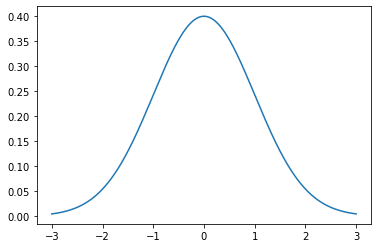

In [11]:
def gaussian(x, mean, sigma):
    return (np.exp((-(x - mean) ** 2) / (2 * sigma ** 2)) / (np.sqrt(2 * np.pi) * sigma))

mean, sigma = 0, 1
x = np.arange(-3, 3, 0.001)
plt.plot(x, gaussian(x, mean, sigma))
plt.show()

从高斯分布图可知，[-2,2]之间的分布占大部分，啥意思呢，说的其实是预测房价跟真实房价大多数情况下都是差异不大的。

在我们的房价预测问题中，均值μ=0，所以可以把公式写成：

$$f(x)=\frac{1}{\sqrt{2π}\sigma}e^{-\frac{x^2}{2\sigma^2}}$$

之前所假设的是误差ε<sub>(i)</sub>服从正态分布，所以ε<sub>(i)</sub>就是正态分布函数中的x，我们再把ε<sub>(i)</sub>代入到公式中：

$$f(ε_{(i)})=\frac{1}{\sqrt{2π}\sigma}e^{-\frac{ε_{(i)}^2}{2\sigma^2}}$$

我们把之前推导出的结果

$$\epsilon_i=y_{(i)}-\theta^Tx_i$$

也就是预测房价与真实房价之间的差距，再代入到公式中：

$$f(y_{(i)}-θ^Tx_i)=\frac{1}{\sqrt{2π}\sigma}e^{-\frac{(y_{(i)}-θ^Tx_i)^2}{2\sigma^2}}$$

在这个公式中，y<sub>(i)</sub>表示的真实房价，是已知的，x<sub>(i)</sub>呢，是每间房子的特征，也就是房屋的平均房间数之类的，也是已知的。

也就是说，整个公式中，只有θ<sup>T</sup>是未知的。

这样的话，咱们把自变量换一下，整成一个关于未知数θ的函数：

$$L(θ)=\frac{1}{\sqrt{2π}\sigma}e^{-\frac{(y_{(i)}-θ^Tx_i)^2}{2\sigma^2}}$$

我们一开始的目的是想让误差变小，在正态分布中，对于自变量x，绝对值越小，越接近于0，因变量的值越大。

好了，现在我们的目的进阶了一下，让L(θ)的值越大越好。

那么，怎么才能让L(θ)的值变大呢？

我们不是有往年的波士顿房价资料么，把以前的一些资料全部代入进去不就行了。

代入一个，得到一个L(θ1)，再代入一个得到一个L(θ2)，然后一直代入，一直代入……

咱们是想让建立的数学模型最好能够拟合所有的样本，也就是说，让所有的L(θ)都最大。

现在把所有的L(θ)整合起来，做一个累乘：

$$L(θ)=\prod_{i=1}^{n}\frac{1}{\sqrt{2π}\sigma}e^{-\frac{(y_{(i)}-θ^Tx_i)^2}{2\sigma^2}}$$

**为什么要做累乘而不是累加呢？**

这个其实跟数学有关，多个样本之间的累乘依然保留原本的分布模式，并且会使常见的概率更常见，这个概率对所有的样本关联性更强。

累加当然可以用，假如说L(θi)={1,2,3,4,5,6,7,8,9}，把所有的数累加起来，其结果sum_L(θi)=45，但是如果把所有的结果累乘起来，其结果ride_L(θi)=362880。

这个时候，如果缺了一个数7，那么sum_L(θi)'=38，ride_L(θi)’=51840，累乘的结果降低的更多，说明累乘的结果对每一个样本的关联性更大。

对于L(θ)，它有一个学名叫似然函数。

来看一下定义：似然函数也是一个概率密度函数L(θ∣x)，表示在样本值x已知的情况下求最可能的θ值；实际运用中，根据我们的样本去估计参数值，找到最最符合的参数，使得与我们的数据组合后恰好是真实值。

暂时不需要去深刻的理解似然函数的概念，咱现在的主要目的是买房。

现在得到了一个累乘的结果L(θ)，但是累乘算起来比较麻烦，咱们可以把累乘转换为累加，方法是对等式两边同时取对数：

$$ln^{L(θ)}=ln^{\prod_{i=1}^{n}\frac{1}{\sqrt{2π}\sigma}e^{-\frac{(y_{(i)}-θ^Tx_i)^2}{2\sigma^2}}}$$

虽然转换了，但是效果还是一样的，只是通过累加来计算而已。

根据对数运算的性质，可以将累乘计算提到ln前边，变成累加运算：

$$ln^{L(θ)}=\sum_{i=1}^nln^{\frac{1}{\sqrt{2π}\sigma}e^{-\frac{(y_{(i)}-θ^Tx_i)^2}{2\sigma^2}}}$$

再看一下右式ln运算的真数：

$$\frac{1}{\sqrt{2π}\sigma}e^{-\frac{(y_{(i)}-θ^Tx_i)^2}{2\sigma^2}}$$

这也是一个乘法运算，而且前一项

$$\frac{1}{\sqrt{2π}\sigma}$$

是一个常数，后一项

$$e^{-\frac{(y_{(i)}-θ^Tx_i)^2}{2\sigma^2}}$$

根据对数运算的性质可以消去e。

化简一下，公式就变成了：

$$ln^{L(θ)}=\sum_{i=1}^n(ln^{\frac{1}{\sqrt{2π}\sigma}}+ln^{e^{-\frac{(y_{(i)}-θ^Tx_i)^2}{2\sigma^2}}})$$

$$=\sum_{i=1}^n(ln^{\frac{1}{\sqrt{2π}\sigma}}-\frac{(y_{(i)}-θ^Tx_i)^2}{2\sigma^2})$$

$$=\sum_{i=1}^nln^{\frac{1}{\sqrt{2π}\sigma}}-\sum_{i=1}^n\frac{(y_{(i)}-θ^Tx_i)^2}{2\sigma^2}$$

之前我们分析过了，整个式子里只有θ<sup>𝑇</sup>是未知数，所以可以先把常数项能化简的化简，能提前的提前，将公式化简为：
    
$$ln^{L(θ)}=nln^{\frac{1}{\sqrt{2π}\sigma}}-{\frac{1}{2\sigma^2}}\sum_{i=1}^n{(y_{(i)}-θ^Tx_i)^2}$$

这时候再看一下公式的常数项：

$$nln^{\frac{1}{\sqrt{2π}\sigma}}和{\frac{1}{\sigma^2}}$$

把1/2保留到变量项里，后续有用。

我们的目的是让似然函数L(θ)越大越好，也就是ln<sup>L(θ)</sup>越大越好，也就是让

$${\frac{1}{2}}\sum_{r=1}^n{(y_{(i)}-θ^Tx_i)^2}$$

越小越好。

写成目标函数:

$$J(θ)={\frac{1}{2}}\sum_{r=1}^n{(y_{(i)}-θ^Tx_i)^2}$$

你可能觉得，

$$y_{(i)}-θ^Tx_i$$

这个式子不就是之前推导出来的么，整了那么一大圈，最后的出来的还是这个。

实则不然，现在要计算的是：J(θ)的最小值，

$$J(θ)=(y_{(i)}-θ^Tx_i)^2$$

当x只有一维取值的时候，这是一个二次函数，用高中的话讲就是一个开口向上的二次函数，有最小值，怎么求呢？

求导，导数为0的时候取极值，极值中存在最值。

我们得到的目标函数J(θ)不是简单的二次函数，而是将所有的x(i)映射到一个x上。

现在得到了目标函数：

$$J(θ)={\frac{1}{2}}\sum_{i=1}^n{(y_{(i)}-θ^Tx_i)^2}$$

转换成矩阵相乘的形式并化简一下：

$$J(θ)={\frac{1}{2}}({Xθ-y})^T({Xθ-y})$$

$$={\frac{1}{2}}({{(Xθ)}^T-y^T})({Xθ-y})$$

$$={\frac{1}{2}}({θ^TX^T-y^T})({Xθ-y})$$

$$={\frac{1}{2}}(θ^TX^TXθ-θ^TX^Ty-y^TXθ+y^Ty)$$

咱们的未知数是θ，现在是一个关于θ的函数，对θ求导得：

$$J'(θ)=X^TXθ-X^Ty$$

令J'(θ)=0得：

$$X^TXθ-X^Ty=0$$

$$X^TXθ=X^Ty$$

$$θ=(X^TX)^{-1}X^Ty$$

现在，我们终于得到得到最终的θ了，为什么说最终了呢？X是已经获得的房屋的数据，y是房价，都是已知的，直接代入就OK了。

有了公式，现在回头来看看真实的问题和真实的数据该怎么处理：

## [House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview)

## [房价：先进的回归技术](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview)

In [12]:
housing = pd.read_csv("train.csv")

In [13]:
housing

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


### 数据预处理

拿到数据之后，不是上来就要进行计算的，首先要做的就是数据预处理。

首先，我们来分析一下每一个x特征，并做一些处理：

#### MSSubClass: Identifies the type of dwelling involved in the sale.	
#### MSSubClass：标识参与销售的住宅类型。

        20	1-STORY 1946 & NEWER ALL STYLES
           1946年1层和更新的所有样式
        30	1-STORY 1945 & OLDER
           1945年1层及以上
        40	1-STORY W/FINISHED ATTIC ALL AGES
           1层，带成品阁楼，所有年龄段
        45	1-1/2 STORY - UNFINISHED ALL AGES
           1-1/2层-未完成所有年龄段
        50	1-1/2 STORY FINISHED ALL AGES
           1-1/2层完成所有年龄段
        60	2-STORY 1946 & NEWER
           1946年2层及以上
        70	2-STORY 1945 & OLDER
           1945年2层及以上
        75	2-1/2 STORY ALL AGES
           2-1/2层，所有年龄段
        80	SPLIT OR MULTI-LEVEL
           拆分或多级
        85	SPLIT FOYER
           分体式门厅
        90	DUPLEX - ALL STYLES AND AGES
           复式-所有样式和年龄
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
          一层建筑（计划单元开发）-1946年及更新版本
       150	1-1/2 STORY PUD - ALL AGES
          1-1/2层布德-所有年龄段
       160	2-STORY PUD - 1946 & NEWER
          两层楼的PUD-1946及更新版本
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
          PUD-多级-包括分离式LEV/门厅
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES
          2家庭转换-所有风格和年龄
 
虽然没太看懂啥意思，但是大致就是MSSubClass越高越好，从一两层的到复式再到什么家庭转换，看着就感觉挺贵的样子。

先看一下MSSubClass这一列有没有缺失值。

In [14]:
housing["MSSubClass"].isnull().sum()

0

MSSubClass这一列数据状况良好，没有缺失值，看一下它的分布情况。

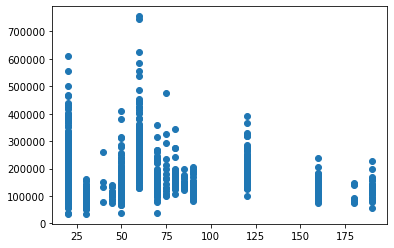

In [15]:
plt.scatter(housing["MSSubClass"], housing["SalePrice"], )
plt.show()

这么一看分布的话，我们之前的猜测不成立啊，MSSubClass和SalePrice不是正相关的关系，那它俩的关系先待定。

通过散点图虽然能看到不同房价的分布，但是有些地方很多点重合在一起，很难看出房价密度。

这时候，我们给MSSubClass和SalePrice添加一个抖动，抖动只是让它在图上的显示位置稍微偏离一下，并不会更改真实的数据，然后再设置一下透明度，重叠的点越多，图像颜色越深。

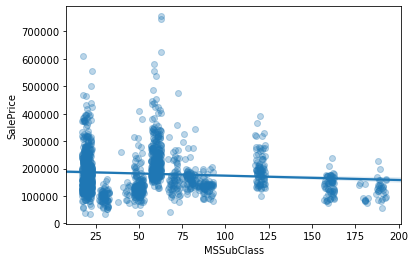

In [16]:
sns.regplot(data=housing, x="MSSubClass", y="SalePrice", x_jitter=3, scatter_kws={"alpha":0.3})

如图可见，大部分MSSubClass都在0~100之内，而MSSubClass与SalePrice的拟合线接近于一条直线，而且有点偏向于负相关。

#### MSZoning: Identifies the general zoning classification of the sale.
#### MSZoning：标识销售的一般分区分类。
		
       A	Agriculture
           农业
       C	Commercial
           商业
       FV	Floating Village Residential
           流动村住宅
       I	Industrial
           工业
       RH	Residential High Density
           住宅高密度
       RL	Residential Low Density
           住宅低密度
       RP	Residential Low Density Park 
           住宅低密度公园
       RM	Residential Medium Density
           住宅中密度

上来还是先看有没有缺失值：

In [17]:
housing["MSZoning"].isnull().sum()

0

In [18]:
housing["MSZoning"].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

没有缺失值，还是看一下MSZoning跟SalePrice的关系，但是我们看一下数据：

In [19]:
housing["MSZoning"]

0       RL
1       RL
2       RL
3       RL
4       RL
        ..
1455    RL
1456    RL
1457    RL
1458    RL
1459    RL
Name: MSZoning, Length: 1460, dtype: object

数据并不是常规的数值，而是字母变量，我们要把字母变量对应到数值。

确定一个简单的对应关系：

1 <—— A    Agriculture

2 <—— C    Commercial

3 <—— FV   Floating Village Residential

4 <—— I    Industrial

5 <—— RH   Residential High Density

6 <—— RL   Residential Low Density

7 <—— RP   Residential Low Density Park 

8 <—— RM   Residential Medium Density

In [20]:
housing.loc[housing["MSZoning"] == "A", "MSZoning"] = 1.0
housing.loc[housing["MSZoning"] == "C (all)", "MSZoning"] = 2.0
housing.loc[housing["MSZoning"] == "FV", "MSZoning"] = 3.0
housing.loc[housing["MSZoning"] == "I", "MSZoning"] = 4.0
housing.loc[housing["MSZoning"] == "RH", "MSZoning"] = 5.0
housing.loc[housing["MSZoning"] == "RL", "MSZoning"] = 6.0
housing.loc[housing["MSZoning"] == "RP", "MSZoning"] = 7.0
housing.loc[housing["MSZoning"] == "RM", "MSZoning"] = 8.0

In [21]:
housing["MSZoning"].value_counts()

6    1151
8     218
3      65
5      16
2      10
Name: MSZoning, dtype: int64

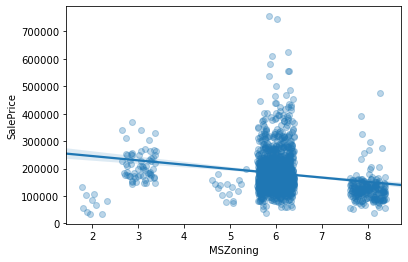

In [22]:
sns.regplot(data=housing, x="MSZoning", y="SalePrice", x_jitter=0.4, scatter_kws={"alpha":0.3})

哎呀我去，我就随便一对应，没想到对应出来一个正相关。

#### LotFrontage: Linear feet of street connected to property
#### 地块临街：连接到地产的街道的直线英尺

In [23]:
housing["LotFrontage"]

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64

In [24]:
housing["LotFrontage"].isnull().sum()

259

终于找到一个含有缺失值的了，LotFrontage列含有259个缺失值，这时候，我们需要对缺失值做填充。

我比较喜欢的一种方案是利用均值和标准差的信息进行填充。

当然，并不是只有LotFrontage采用缺失值，所以我们可以把缺失值填充抽象成一个函数。

In [25]:
def fill_null(df, col):
    mean = df[col].dropna().mean()
    std = df[col].dropna().std()
    null_sum = df[col].isnull().sum()
    fill_num = np.random.randint(mean - std, mean + std, null_sum)
    df.loc[df[col].isnull(), col] = fill_num

In [26]:
fill_null(housing, "LotFrontage")

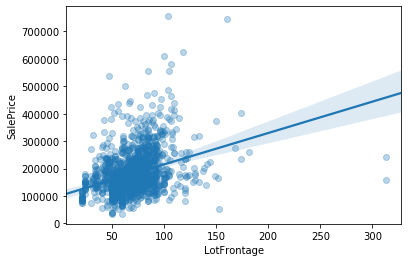

In [28]:
sns.regplot(data=housing, x="LotFrontage", y="SalePrice", scatter_kws={"alpha":0.3})

这么一看的话，LotFrontage和SalePrice也是成正相关的关系。

#### LotArea: Lot size in square feet

In [30]:
housing["LotArea"].isnull().sum()

0

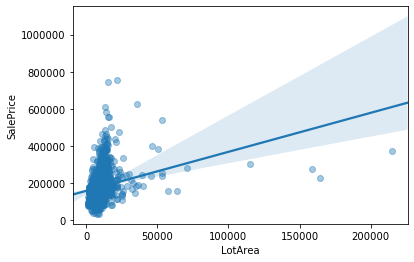

In [35]:
sns.regplot(data=housing, x="LotArea", y="SalePrice", scatter_kws={"alpha":0.4})

### 总结

找一下套路，对于每一个特征数据：

    1.判断该列数据是不是数值

        1.1、